## Разведочный анализ с Seaborn


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import scipy.stats as sts
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

In [7]:
# импортирование данных

data = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/house_prices.csv')

In [ ]:
# определение количественных и категориальных переменных

numerical_features = data.select_dtypes(include=[np.number])
categorical_features = data.select_dtypes(include=[np.object])

### Задание 1.
Проанализировать распределение признака **1stFlrSF** и еще 3 количественных признаков, выбранных по собственному усмотрению на предмет наличия аномальных значений. Анализ и выводы (с обоснованиями) оформить в виде отчета.

Analyze the distribution of the feature **1stFlrSF** and 3 more quantitative features selected at your own discretion for the presence of abnormal values (outliers). The analysis and conclusions (with justifications) should be presented in the form of a report.

### Решение с анализом.

* Как указано ранее, мы имеем следующие количественные признаки: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold<br><br>
    * построим гистограмму для всех признаков
    * вроде все количественные признаки не нормально распределены
    * признаки `1stFlrSF`, `BsmtFinSF1` и т. д. имеют положительную (правостороннюю) асимметрию (right-skewed)
    * признаки `GarageYrBlt`, `YearBuilt` и т. д. имеют отрицательную (левостороннюю) асимметрию (left-skewed)
    * выбираем эти признаки для дальнейшего анализа `1stFlrSF`, `GarageArea`, `LotArea`, `GrLivArea`
<br><br>
* Для дальнейшего анализа здесь мы проверяем асимметрию и эксцесс для каждой функции. Мы обнаруживаем, что все четыре распределения имеют положительный эксцесс и поэтому называются лептокуртическими. Лептокуртическое распределение имеет более толстые хвосты, такие распределения иногда называют супергауссовыми. Кроме того, все четыре распределения имеют положительную асимметрию, что означает, что правый хвост длиннее, а масса распределения сосредоточена в левой части рисунка. 
<br><br>
* For further analysis, here we check the skewness and kurtosis for each feature. We find out that all four distributions are with positive excess kurtosis and thus are called leptokurtic. A leptokurtic distribution has fatter tails, such distributions are sometimes termed super-Gaussian. Also, all four distributions have positive skew, which means that the right tail is longer, and the mass of the distribution is concentrated on the left of the figure. The distribution is said to be right-skewed, right-tailed, or skewed to the right.

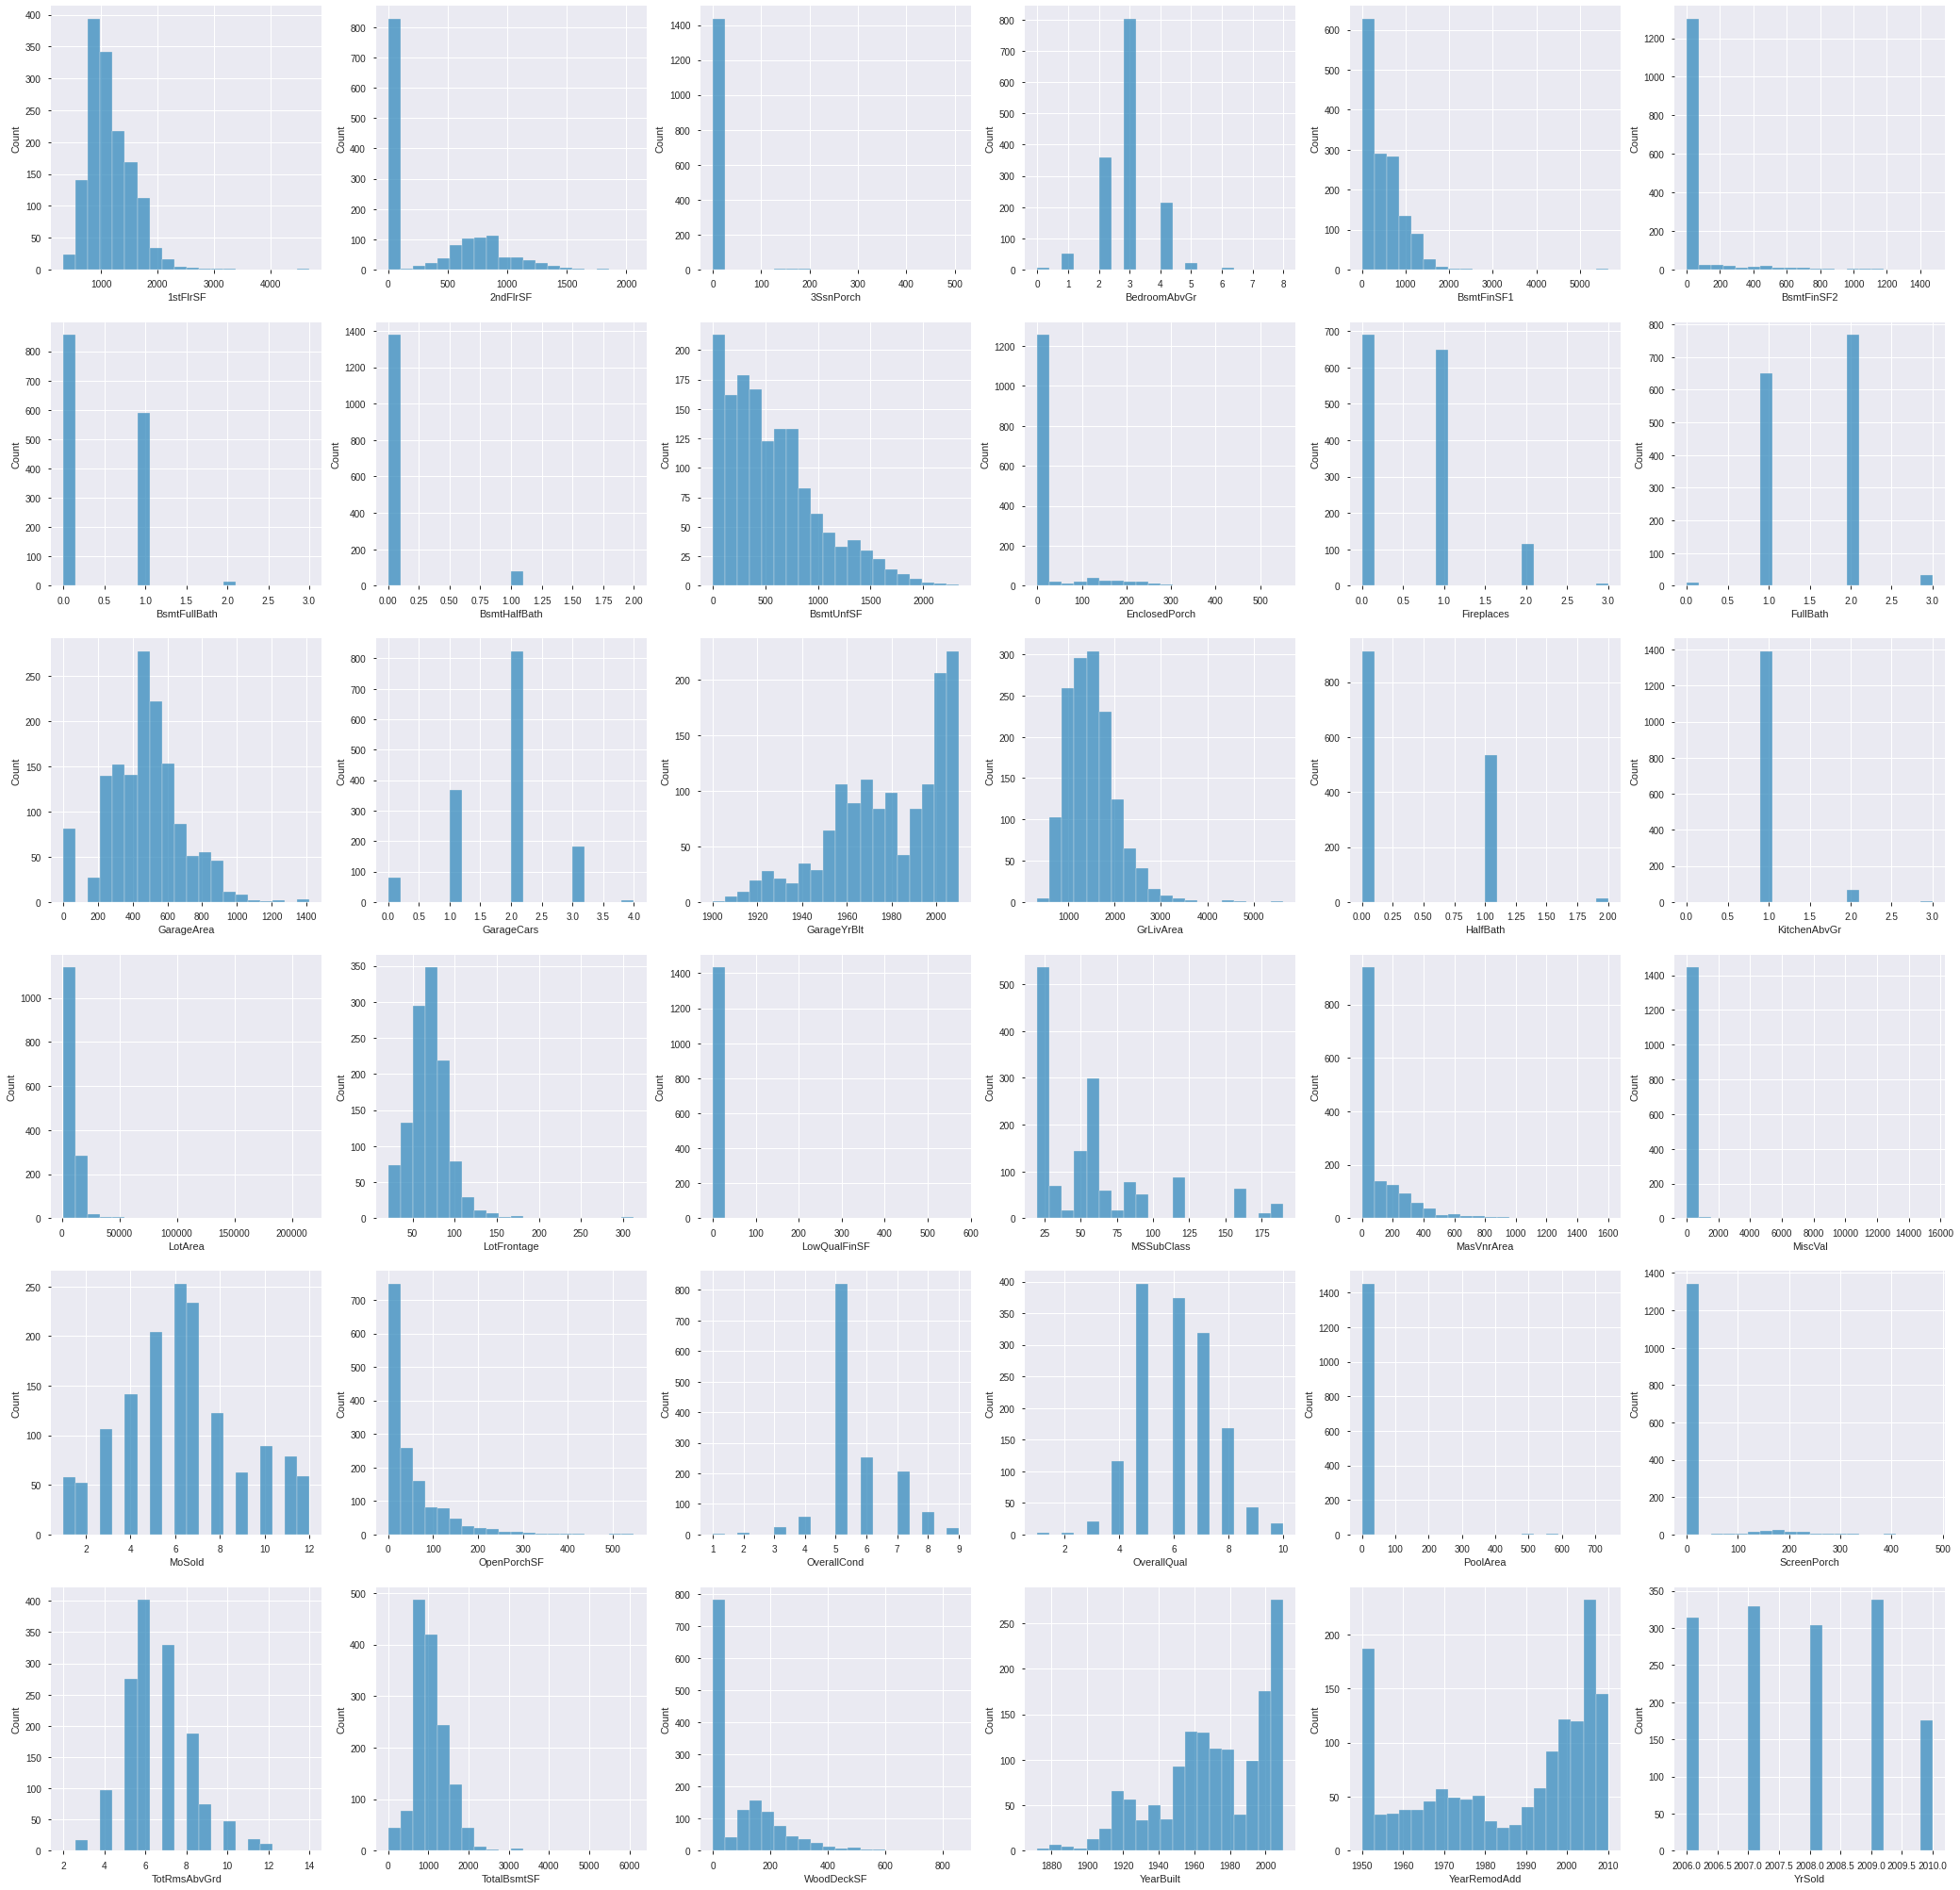

In [9]:
fig, ax = plt.subplots(6,6, figsize=(36,36))

sns.histplot(data['1stFlrSF'], bins = 20, ax=ax[0,0])
sns.histplot(data['2ndFlrSF'], bins = 20, ax=ax[0,1])
sns.histplot(data['3SsnPorch'], bins = 20, ax=ax[0,2])
sns.histplot(data['BedroomAbvGr'], bins = 20, ax=ax[0,3])
sns.histplot(data['BsmtFinSF1'], bins = 20, ax=ax[0,4])
sns.histplot(data['BsmtFinSF2'], bins = 20, ax=ax[0,5])

sns.histplot(data['BsmtFullBath'], bins = 20, ax=ax[1,0])
sns.histplot(data['BsmtHalfBath'], bins = 20, ax=ax[1,1])
sns.histplot(data['BsmtUnfSF'], bins = 20, ax=ax[1,2])
sns.histplot(data['EnclosedPorch'], bins = 20, ax=ax[1,3])
sns.histplot(data['Fireplaces'], bins = 20, ax=ax[1,4])
sns.histplot(data['FullBath'], bins = 20, ax=ax[1,5])

sns.histplot(data['GarageArea'], bins = 20, ax=ax[2,0])
sns.histplot(data['GarageCars'], bins = 20, ax=ax[2,1])
sns.histplot(data['GarageYrBlt'], bins = 20, ax=ax[2,2])
sns.histplot(data['GrLivArea'], bins = 20, ax=ax[2,3])
sns.histplot(data['HalfBath'], bins = 20, ax=ax[2,4])
sns.histplot(data['KitchenAbvGr'], bins = 20, ax=ax[2,5])

sns.histplot(data['LotArea'], bins = 20, ax=ax[3,0])
sns.histplot(data['LotFrontage'], bins = 20, ax=ax[3,1])
sns.histplot(data['LowQualFinSF'], bins = 20, ax=ax[3,2])
sns.histplot(data['MSSubClass'], bins = 20, ax=ax[3,3])
sns.histplot(data['MasVnrArea'], bins = 20, ax=ax[3,4])
sns.histplot(data['MiscVal'], bins = 20, ax=ax[3,5])

sns.histplot(data['MoSold'], bins = 20, ax=ax[4,0])
sns.histplot(data['OpenPorchSF'], bins = 20, ax=ax[4,1])
sns.histplot(data['OverallCond'], bins = 20, ax=ax[4,2])
sns.histplot(data['OverallQual'], bins = 20, ax=ax[4,3])
sns.histplot(data['PoolArea'], bins = 20, ax=ax[4,4])
sns.histplot(data['ScreenPorch'], bins = 20, ax=ax[4,5])

sns.histplot(data['TotRmsAbvGrd'], bins = 20, ax=ax[5,0])
sns.histplot(data['TotalBsmtSF'], bins = 20, ax=ax[5,1])
sns.histplot(data['WoodDeckSF'], bins = 20, ax=ax[5,2])
sns.histplot(data['YearBuilt'], bins = 20, ax=ax[5,3])
sns.histplot(data['YearRemodAdd'], bins = 20, ax=ax[5,4])
sns.histplot(data['YrSold'], bins = 20, ax=ax[5,5])

plt.show()

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


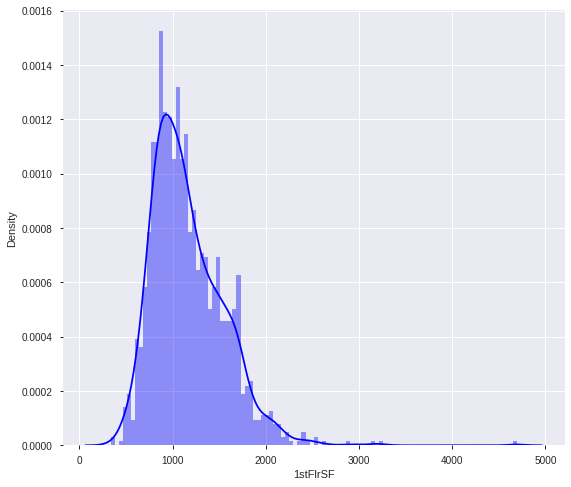

In [10]:
# распределение 1stFlrSF

print(data['1stFlrSF'].describe())
plt.figure(figsize=(9, 8));
sns.distplot(data['1stFlrSF'], color='b', bins=100, hist_kws={'alpha': 0.4});

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


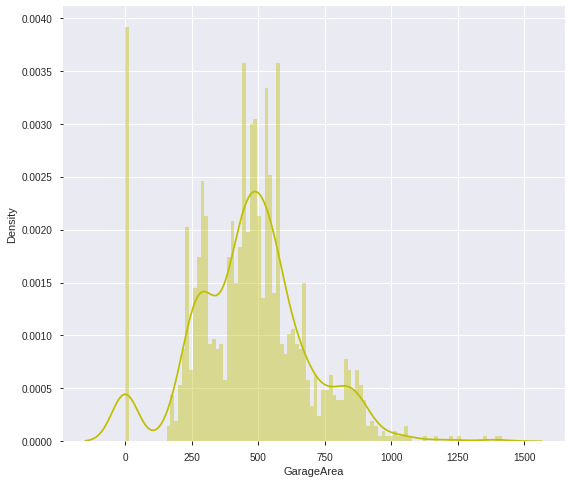

In [11]:
# распределение GarageArea

print(data['GarageArea'].describe())
plt.figure(figsize=(9, 8));
sns.distplot(data['GarageArea'], color='y', bins=100, hist_kws={'alpha': 0.4});

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


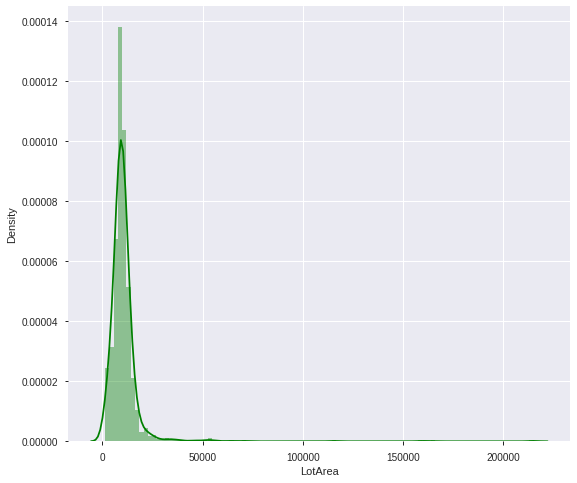

In [12]:
# распределение LotArea

print(data['LotArea'].describe())
plt.figure(figsize=(9, 8));
sns.distplot(data['LotArea'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


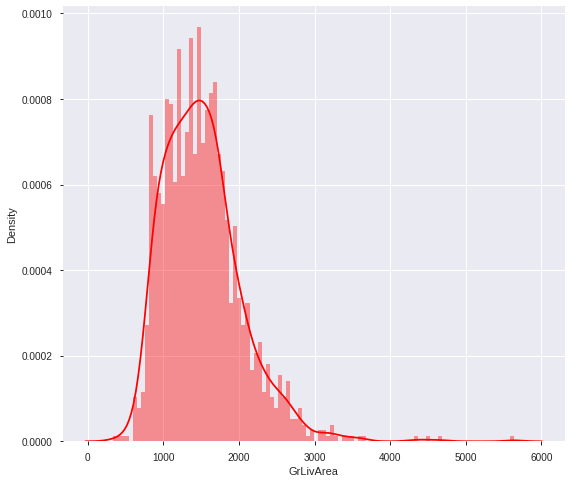

In [13]:
# распределение GrLivArea

print(data['GrLivArea'].describe())
plt.figure(figsize=(9, 8));
sns.distplot(data['GrLivArea'], color='r', bins=100, hist_kws={'alpha': 0.4});

In [14]:
def kurtosis_status(kurtosis: float) -> str:
    if kurtosis > 0:
        return 'leptokurtic'
    elif kurtosis < 0:
        return 'platykurtic'
    else:
        return 'mesokurtic'
    
def skew_status(skew: float) -> str:
    pn_status = 'негативное' if skew < 0 else 'положительное'
    scale_status = 'умеренное' if abs(skew) >= 0.5 and abs(skew) <= 1 else 'высокое'
    return f'{scale_status} {pn_status}'

def show_stats(series):
    print(f'Признак / Feature {series.name}')
    skew = series.skew()
    kurtosis = series.kurtosis()
    print(f'Асимметрия / Skewness ({skew_status(skew)}): {round(skew, 2)}')
    print(f'Эксцесс / Kurtosis ({kurtosis_status(kurtosis)}): {round(kurtosis, 2)} \n')

In [15]:
all_series = [
    numerical_features['1stFlrSF'],
    numerical_features['GarageArea'],
    numerical_features['LotArea'],
    numerical_features['GrLivArea'],
]

for series in all_series:
    show_stats(series)

Признак / Feature 1stFlrSF
Асимметрия / Skewness (высокое положительное): 1.38
Эксцесс / Kurtosis (leptokurtic): 5.75 

Признак / Feature GarageArea
Асимметрия / Skewness (высокое положительное): 0.18
Эксцесс / Kurtosis (leptokurtic): 0.92 

Признак / Feature LotArea
Асимметрия / Skewness (высокое положительное): 12.21
Эксцесс / Kurtosis (leptokurtic): 203.24 

Признак / Feature GrLivArea
Асимметрия / Skewness (высокое положительное): 1.37
Эксцесс / Kurtosis (leptokurtic): 4.9 



### Задание 2.

Попытаться обосновать **стратегию обработки выбросов для всех анализируемых столбцов**. Анализ и выводы (с обоснованиями) оформить в виде отчета.

Try to justify an **outlier processing strategy for all analyzed columns**. The analysis and conclusions (with justifications) should be presented in the form of a report.

### Решение с анализом.

* `GarageArea` — есть много значений 0, это означает, что эти дома не имеют `GarageArea`, а если выбросы будут обработаны, то линия тренда скорее всего поднимется вверх
* `GrLivArea` — нижние правые значения скорее всего будут выбросами, но при их удалении линия тренда никак не изменит своего положения
* `LotArea` — из графика видно, что `LotArea` не имеет положительной связи (корреляции) с `SalePrice`

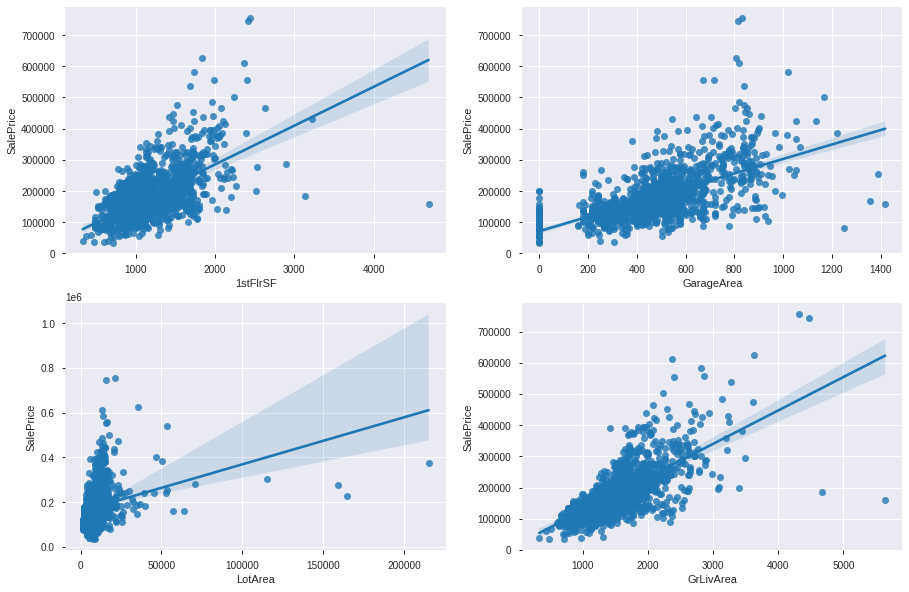

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
ax_lst = [ax[0][0], ax[0][1], ax[1][0], ax[1][1]]
new_cols = ['1stFlrSF', 'GarageArea', 'LotArea', 'GrLivArea']
for col,ax_i in zip(new_cols, ax_lst):
    sns.regplot(x = col, y = 'SalePrice', data = data, scatter = True, fit_reg = True, ax = ax_i)

### Задание 3.

Выполнить анализ трех категориальных признаков, выбранных по собственному усмотрению. Анализ и выводы (с обоснованиями) оформить в виде отчета.

Perform an analysis of three categorical features, selected at your own discretion. The analysis and conclusions (with justifications) should be presented in the form of a report.

### Решение с анализом.

* выбираем эти признаки для дальнейшего анализа `BsmtQual`, `ExterQual`, `ExterCond`
* проверяем, есть ли у них пропуски, и мы узнали, что из трех только `BsmtQual` имеет пробелы
* пропуски в `BsmtQual` означают, что в доме нет подвала на основании файла описания проекта, поэтому мы заменяем 37 значений NA на «no»
* после анализа узнаем что:
    * `BsmtQual` — есть много выбросов для значения Gd и Ex
    * `ExterQual` — также есть много выбросов для значения Gd и Ex
    * `ExterCond` — есть много выбросов для значения TA и Gd, категорию Po можно объединить или удалить
<br><br>
* для дальнейшего анализа можно выполнить преобразование в числовые значения, примерно так:
    * Ex (excellent) преобразовать в 1
    * Gd (good) преобразовать в 2
    * TA (typical) преобразовать в 3
    * Fa (fair) преобразовать в 4
    * Po (poor) преобразовать в 5

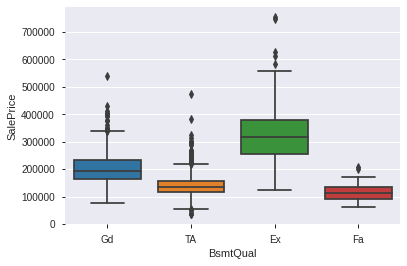

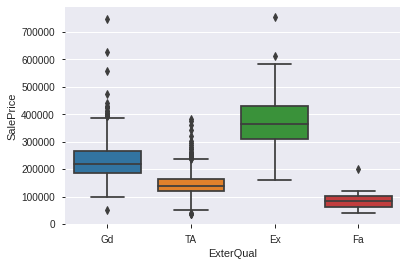

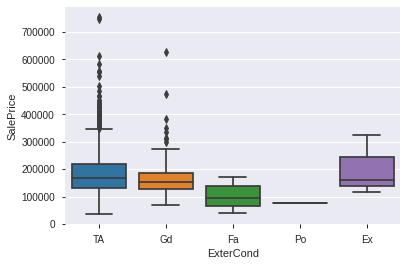

In [17]:
cat_cols = ['BsmtQual', 'ExterQual', 'ExterCond']
for col in cat_cols:
    sns.boxplot(x=col, y='SalePrice', data=data)
    plt.show()

In [18]:
data.BsmtQual.isna().sum()

37

In [19]:
data.ExterQual.isna().sum()

0

In [20]:
data.ExterCond.isna().sum()

0

In [21]:
data['BsmtQual'].fillna(value='no',inplace= True)

In [22]:
data.BsmtQual.isna().sum()

0

In [23]:
data['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [24]:
data['ExterCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [25]:
data['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'no', 'Fa'], dtype=object)

In [26]:
for i in ['ExterQual','ExterCond','BsmtQual']:
        data[i]= data[i].map({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'no':5})

In [27]:
data['ExterQual'].unique()

array([2, 3, 1, 4])

In [28]:
data['ExterCond'].unique()

array([3, 2, 4, 5, 1])

In [29]:
data['BsmtQual'].unique()

array([2, 3, 1, 5, 4])

### Дополнительные материалы.

Существуют специальные библиотеки для EDA. Например, **pandas_profiling**. Её нет в стандартном наборе Анаконды, но ее легко установить через pip. [Статья на хабре](https://habr.com/ru/company/ruvds/blog/451478/)

In [30]:
pip install pandas-profiling[notebook]

In [31]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data)
profile.to_file("profile_report.html")